In [107]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from nltk.tokenize import word_tokenize
import warnings
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
nltk.download("punkt")
nltk.download("stopwords")
warnings.filterwarnings("ignore", category=UserWarning)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
df=pd.read_csv("/kaggle/input/the-power-of-social-media-engagement/social_media_engagement.csv")

In [44]:
label_encoder=LabelEncoder()
label={}
data=["platform","post_type","post_day","sentiment_score"]
for i in data:
    label_encoder=LabelEncoder()

    df[i]=label_encoder.fit_transform(df[i])
    label['data']=label_encoder

In [45]:
label

{'data': LabelEncoder()}

In [46]:
df

,post_id,platform,post_type,post_time,caption,hashtags,likes,comments,shares,caption_length,num_hashtags,post_hour,post_day,sentiment_score
0,1,0,1,2023-08-17 14:45,Best day ever! 🎉,#Social,2121,474,628,16,1,14,4,2
1,2,0,0,2023-05-14 00:45,Here's a quick update.,"#Family, #Community, #Events",3660,432,694,22,3,0,3,1
2,3,1,2,2023-02-21 16:15,Not my best day. 😞,"#Beauty, #Fashion, #InstaDaily",4955,408,688,18,3,16,5,0
3,4,2,1,2023-11-16 00:45,Disappointed but moving on.,"#Trending, #Tech, #Entertainment",1183,90,187,27,3,0,4,0
4,5,2,4,2023-05-23 00:30,Exciting news! 🚀,"#News, #Politics, #Entertainment",3499,247,286,16,3,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1,4,2023-04-25 07:15,Not my best day. 😞,"#Beauty, #Travel, #Tech",5000,338,420,18,3,7,5,0
996,997,2,1,2023-09-09 07:30,Could be better.,"#Tech, #Sports, #Entertainment",880,90,45,16,3,7,2,0
997,998,1,4,2023-08-18 23:15,Feeling down today.,#Photography,5000,263,274,19,1,23,0,0
998,999,0,3,2023-10-05 00:15,Best day ever! 🎉,#Friends,1075,46,21,16,1,0,4,2


In [47]:
def text_preprocess(text):
    data=text.lower()
    data_re=re.sub(r"\W+"," ",data)
    word_data=word_tokenize(data_re)
    return " ".join(word_data)
def text_vectorizer(text):
    # text=str(text)
    vect={}
    vectorizer=TfidfVectorizer()
    data=vectorizer.fit_transform(text)
    df=pd.DataFrame(data.toarray(),columns=vectorizer.get_feature_names_out())
    vez=vectorizer.get_feature_names_out()
    vect["vector"]=vectorizer
    return df,vez

In [48]:
vectorized_text=[]
for i in ["caption","hashtags"]:
    df[i]=df[i].apply(text_preprocess)
    data,vez=text_vectorizer(df[i].tolist())
    vectorized_text.append(data)
# vectorized_text=pd.DataFrame(vectorized_text,columns=vez)

In [49]:
concat=pd.concat(vectorized_text,axis=1)
concat

,amazing,another,be,best,better,but,check,could,day,disappointed,...,marketing,memes,news,photography,politics,social,sports,tech,travel,trending
0,0.0,0.0,0.00000,0.548425,0.00000,0.0,0.0,0.00000,0.468047,0.0,...,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
1,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
2,0.0,0.0,0.00000,0.455524,0.00000,0.0,0.0,0.00000,0.388762,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
3,0.0,0.0,0.00000,0.000000,0.00000,0.5,0.0,0.00000,0.000000,0.5,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.481949,0.00000,0.624615
4,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.589487,0.0,0.570272,0.0,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.00000,0.455524,0.00000,0.0,0.0,0.00000,0.388762,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.481177,0.62997,0.000000
996,0.0,0.0,0.57735,0.000000,0.57735,0.0,0.0,0.57735,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.613539,0.487338,0.00000,0.000000
997,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
998,0.0,0.0,0.00000,0.548425,0.00000,0.0,0.0,0.00000,0.468047,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000


In [50]:
concat2=pd.concat([df,concat],axis=1).drop(columns=["caption","hashtags","post_time"])
concat2

,post_id,platform,post_type,likes,comments,shares,caption_length,num_hashtags,post_hour,post_day,...,marketing,memes,news,photography,politics,social,sports,tech,travel,trending
0,1,0,1,2121,474,628,16,1,14,4,...,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
1,2,0,0,3660,432,694,22,3,0,3,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
2,3,1,2,4955,408,688,18,3,16,5,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
3,4,2,1,1183,90,187,27,3,0,4,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.481949,0.00000,0.624615
4,5,2,4,3499,247,286,16,3,0,5,...,0.0,0.0,0.589487,0.0,0.570272,0.0,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1,4,5000,338,420,18,3,7,5,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.481177,0.62997,0.000000
996,997,2,1,880,90,45,16,3,7,2,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.613539,0.487338,0.00000,0.000000
997,998,1,4,5000,263,274,19,1,23,0,...,0.0,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
998,999,0,3,1075,46,21,16,1,0,4,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000


In [66]:
X=concat2.drop(columns=["caption_length"])
Y=concat2["caption_length"]

In [67]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=42)

In [74]:
concat2["caption_length"].value_counts().sum(
    
)
print(concat2["caption_length"].unique())

[16 22 18 27 23 17 19 21]


<Axes: >

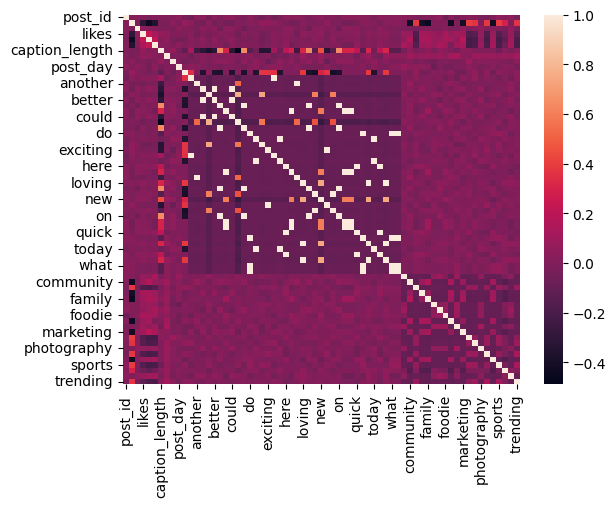

In [70]:
sns.heatmap(concat2.corr())

In [81]:
for i in [RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),BaggingClassifier(),SVC(),DecisionTreeClassifier(),LogisticRegression()]:
    random_reg=RandomForestClassifier()
    random_reg.fit(X_train,Y_train)
    
    print(f"the accuray of {i}",random_reg.score(X_test,Y_test))

the accuray of RandomForestClassifier() 1.0
the accuray of GradientBoostingClassifier() 1.0
the accuray of AdaBoostClassifier() 1.0
the accuray of BaggingClassifier() 1.0
the accuray of SVC() 1.0
the accuray of DecisionTreeClassifier() 1.0
the accuray of LogisticRegression() 1.0


In [86]:
X_train.shape

(900, 66)

In [90]:
Y.nunique()

8

# # # Deep Learning# 

In [92]:
from keras.layers import Layer,Dense,Flatten,LSTM,GRU,BatchNormalization,Dropout,Input
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD,RMSprop,Adam,AdamW,Adadelta,Adagrad,Adamax,Adafactor,Nadam,Ftrl,Lion,Lamb

In [93]:
early_stopping=EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=0
)

In [99]:
np.unique(Y_train)

array([16, 17, 18, 19, 21, 22, 23, 27])

In [100]:
inputs=Input(shape=(66,))
D=Dense(32,activation='relu')(inputs)
output=Dense(1)(D)
model=Model(inputs,output)
model_value={}
model.summary()
for i in [SGD,RMSprop,Adam,AdamW,Adadelta,Adagrad,Adamax,Adafactor,Nadam,Ftrl,Lion,Lamb]:
    model.compile(optimizer=i(),loss="mse",metrics=["accuracy"])
    model_value[f"model_optimizer{i}"]=model.fit(X_train,Y_train,batch_size=32,epochs=50,callbacks=[early_stopping])

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 66)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,177 (8.50 KB)

 Trainable params: 2,177 (8.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan           
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 16/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 16/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accurac

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 16/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 16/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accurac

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 16/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accurac

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: nan 
Epoch 16/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

In [101]:
model_value

{"model_optimizer<class 'keras.src.optimizers.sgd.SGD'>": <keras.src.callbacks.history.History at 0x7c8ff0715180>,
 "model_optimizer<class 'keras.src.optimizers.rmsprop.RMSprop'>": <keras.src.callbacks.history.History at 0x7c8ff0714670>,
 "model_optimizer<class 'keras.src.optimizers.adam.Adam'>": <keras.src.callbacks.history.History at 0x7c8ff0714250>,
 "model_optimizer<class 'keras.src.optimizers.adamw.AdamW'>": <keras.src.callbacks.history.History at 0x7c8ff0715b10>,
 "model_optimizer<class 'keras.src.optimizers.adadelta.Adadelta'>": <keras.src.callbacks.history.History at 0x7c8ff0438e50>,
 "model_optimizer<class 'keras.src.optimizers.adagrad.Adagrad'>": <keras.src.callbacks.history.History at 0x7c8ff04c82b0>,
 "model_optimizer<class 'keras.src.optimizers.adamax.Adamax'>": <keras.src.callbacks.history.History at 0x7c8ff0640910>,
 "model_optimizer<class 'keras.src.optimizers.adafactor.Adafactor'>": <keras.src.callbacks.history.History at 0x7c8ff0472530>,
 "model_optimizer<class 'keras

In [ ]:
for optimizeer_history,history_value in model_value.items():
    history=history_value.history
    

In [102]:
# Assuming model_value contains the history object for each optimizer
for optimizer_name, history_obj in model_value.items():
    print(f"Training history for {optimizer_name}:")
    
    # Accessing the loss and accuracy values from the history object
    history = history_obj.history
    
    # Print loss and accuracy for each epoch
    print("Loss:", history['loss'])
    print("Accuracy:", history['accuracy'])
    print("Validation Loss:", history.get('val_loss', 'No validation loss'))
    print("Validation Accuracy:", history.get('val_accuracy', 'No validation accuracy'))
    print("\n")


Training history for model_optimizer<class 'keras.src.optimizers.sgd.SGD'>:
Loss: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
Accuracy: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Validation Loss: No validation loss
Validation Accuracy: No validation accuracy


Training history for model_optimizer<class 'keras.src.optimizers.rmsprop.RMSprop'>:
Loss: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

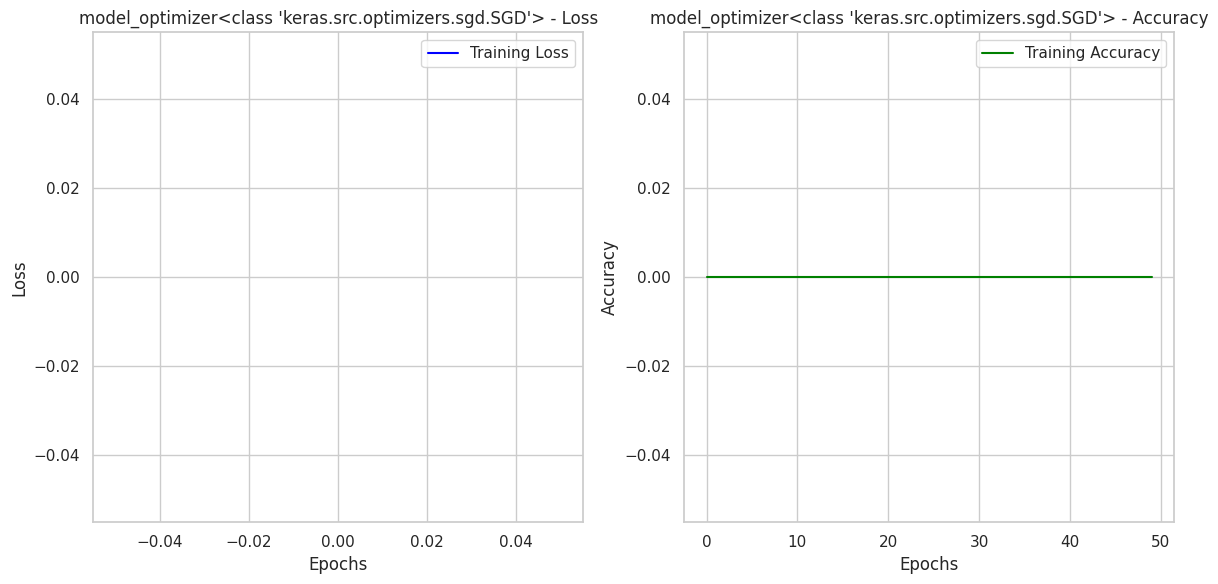

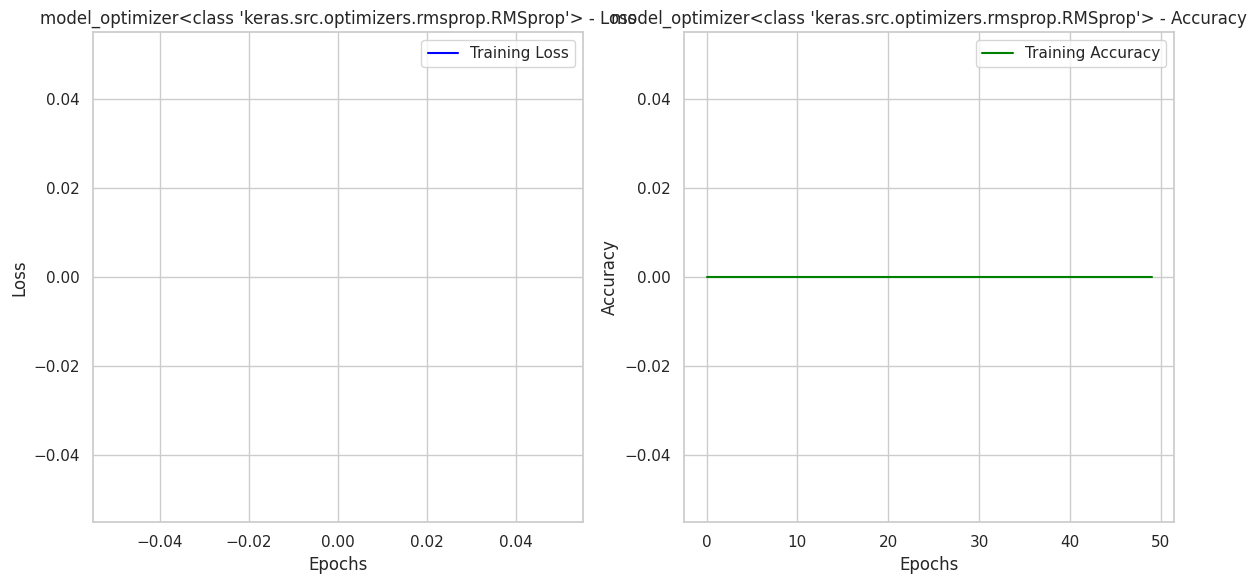

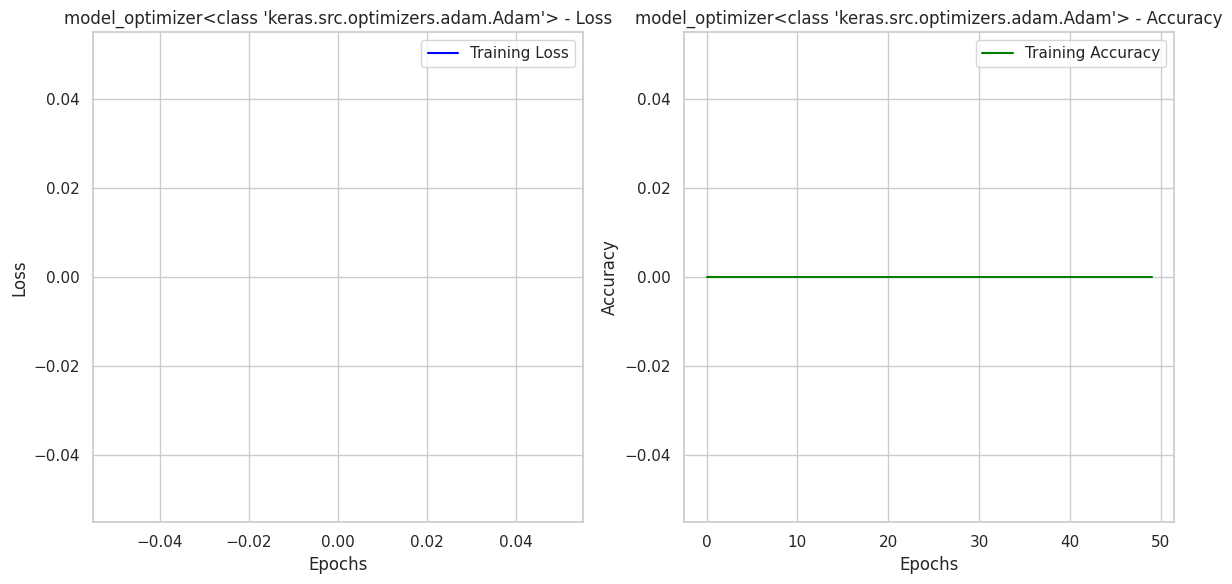

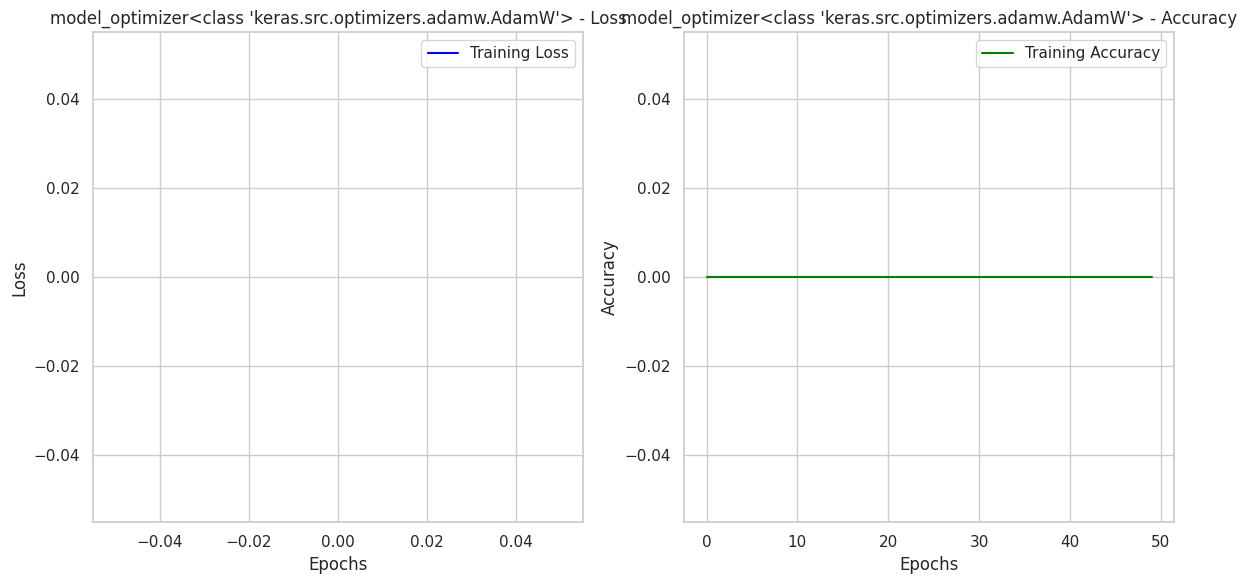

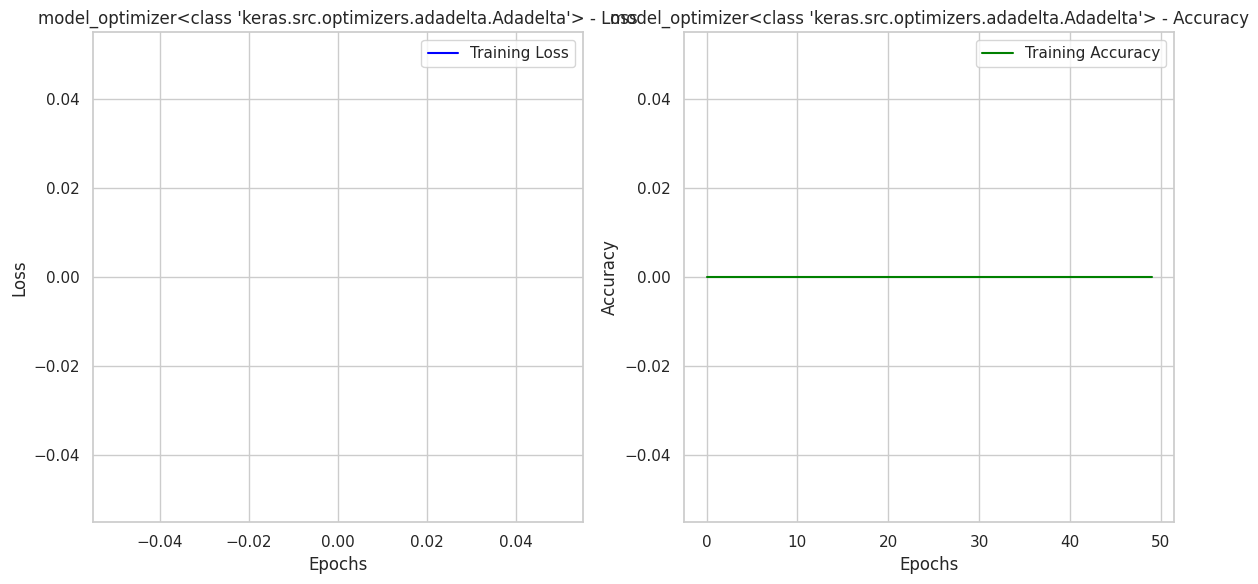

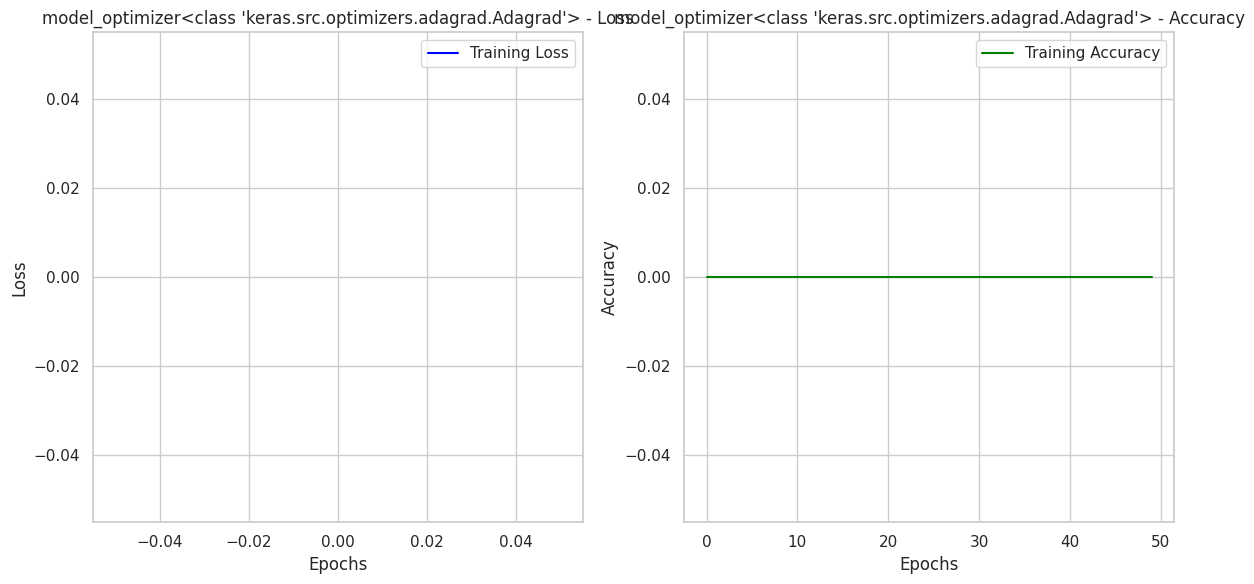

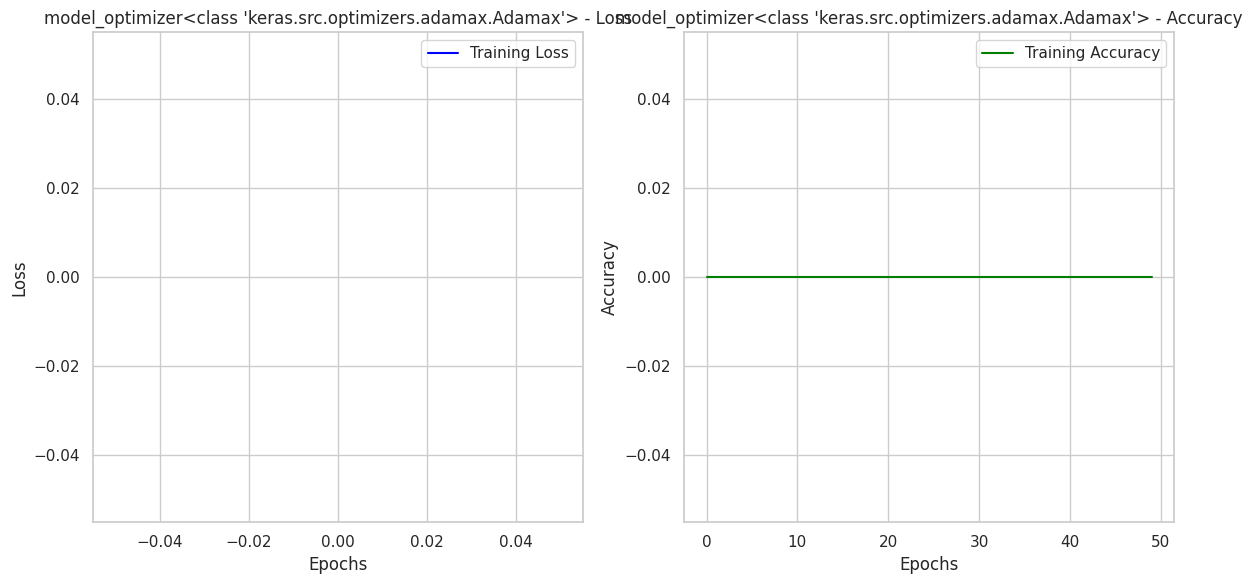

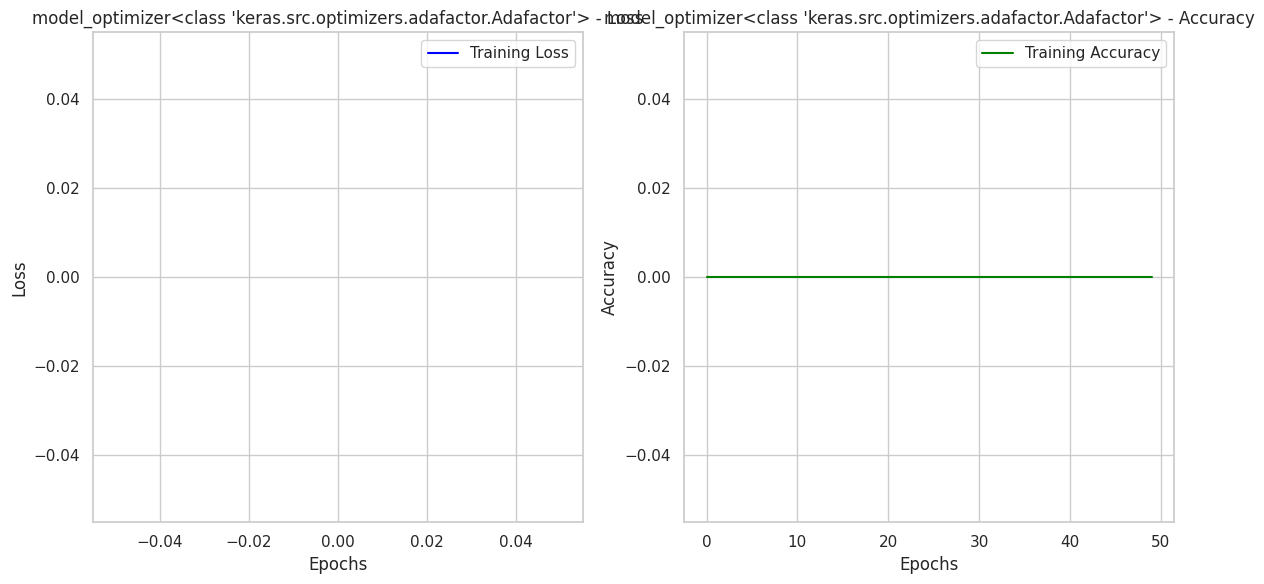

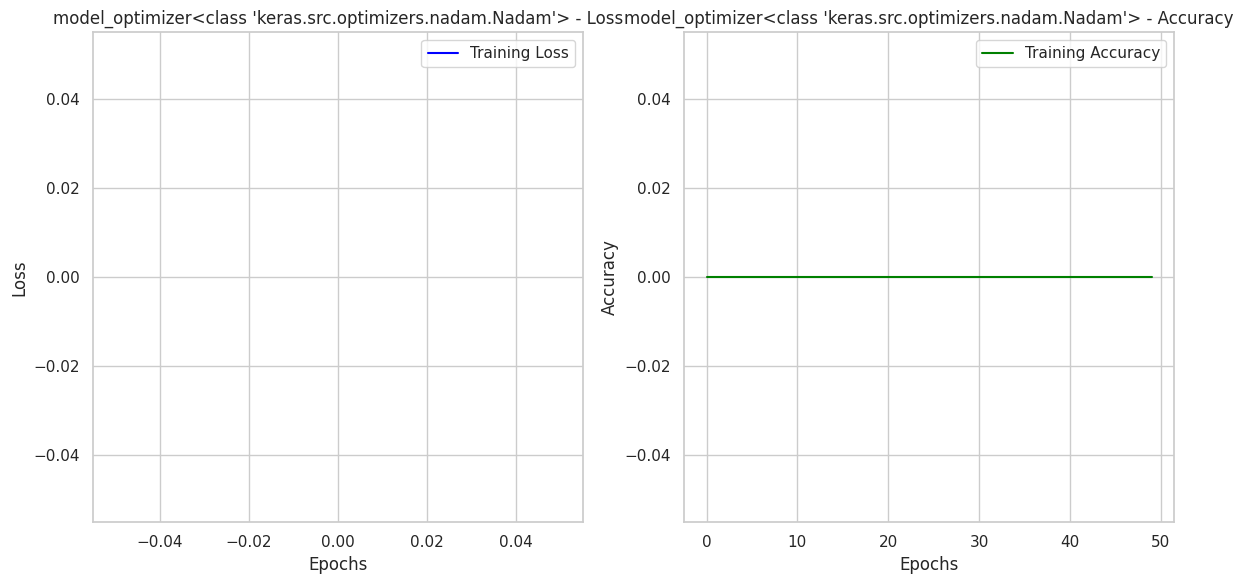

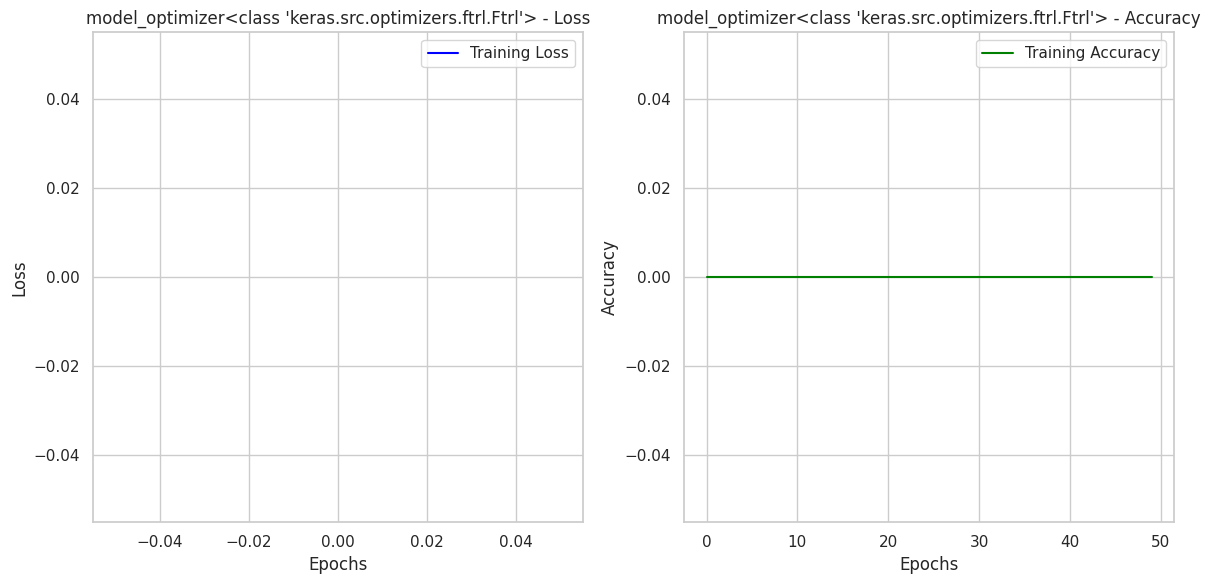

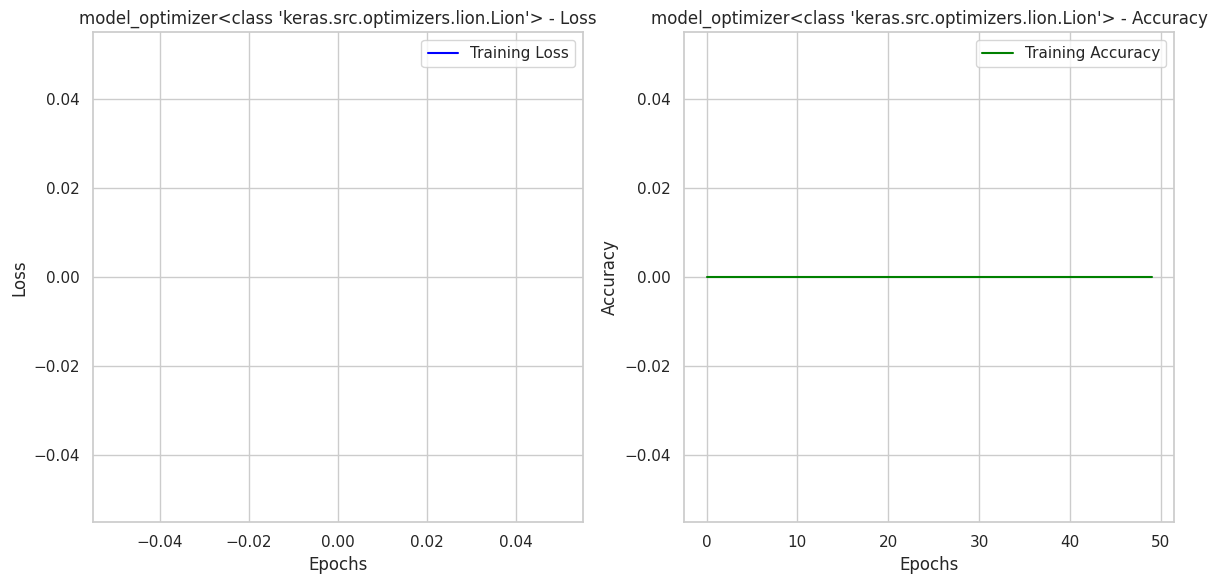

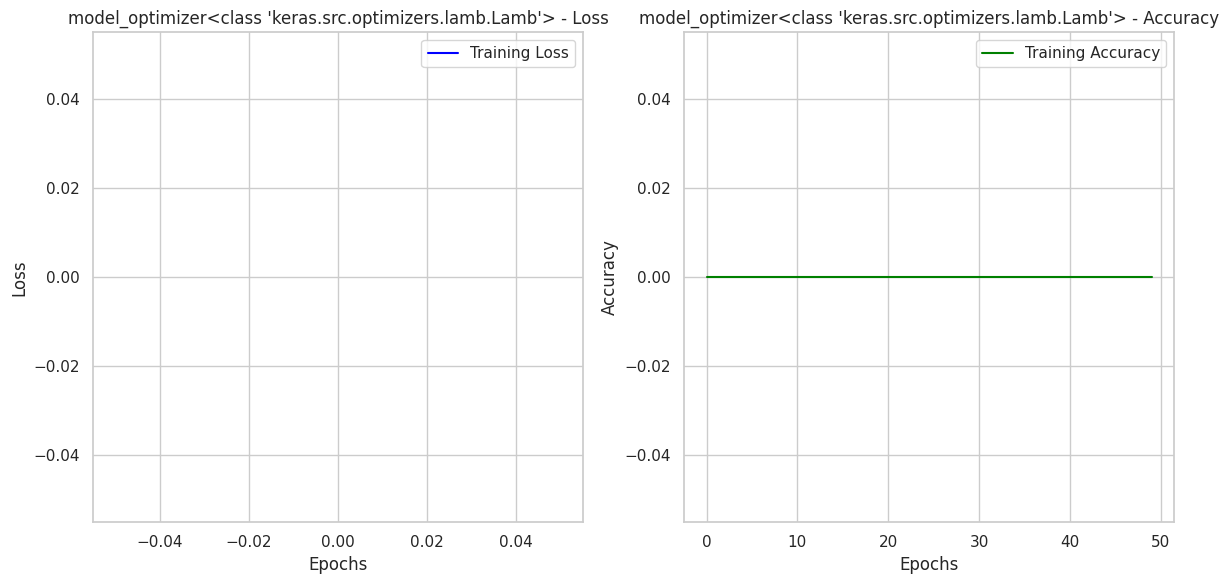

In [110]:
import matplotlib.pyplot as plt

# Assuming model_value contains the history object for each optimizer
for optimizer_name, history_obj in model_value.items():
    history = history_obj.history
    
    # Plotting Loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Training Loss', color='blue')
    if 'val_loss' in history:
        plt.plot(history['val_loss'], label='Validation Loss', color='red')
    plt.title(f'{optimizer_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Training Accuracy', color='green')
    if 'val_accuracy' in history:
        plt.plot(history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title(f'{optimizer_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
